In [17]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pylab 

# File to Load (Remember to change these)
# Read the City and Ride Data
city_data_to_load = pd.read_csv("city_data.csv")
ride_data_to_load = pd.read_csv("ride_data.csv")

# Combine the data into a single dataset
pyber = pd.merge(ride_data_to_load, city_data_to_load, on="city")

# Display the data table for preview
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

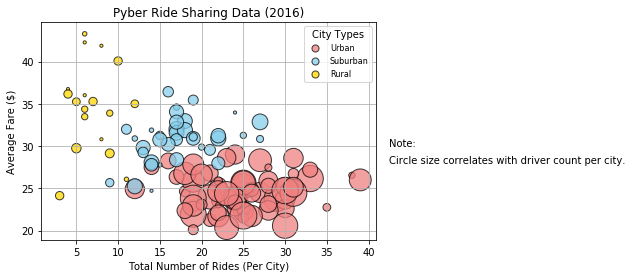

In [18]:
# Obtain the x and y coordinates for each of the three city types
#Average Fare ($) Per City
avg_fare = pyber.groupby(["city"])
avg_fare = avg_fare["fare"].mean()
avg_fare

#Total Number of Rides Per City
total_rides = pyber.groupby(["city"])
total_rides = total_rides["ride_id"].count()
total_rides

#Total Number of Drivers Per City
total_drivers = city_data_to_load.groupby(["city"])
total_drivers = total_drivers["driver_count"].sum()
total_drivers

#City Type (Urban, Suburban, Rural)
city_index = city_data_to_load.set_index("city")
city_type = city_index["type"]
city_type

#create dataframe to graph
bubble_summary = pd.DataFrame({"Average Fare": avg_fare,
                               "Total Rides": total_rides,
                               "Total Drivers": total_drivers,
                               "City Types": city_type
                              })
                    
bubble_summary 

#create filter by city types
urban = bubble_summary.loc[(bubble_summary["City Types"] == "Urban")]
suburban = bubble_summary.loc[(bubble_summary["City Types"] == "Suburban")]
rural = bubble_summary.loc[(bubble_summary["City Types"] == "Rural")]

#bubble size
s_u = [n*10 for n in urban["Total Drivers"]]
s_s = [n*10 for n in suburban["Total Drivers"]]
s_r = [n*10 for n in rural["Total Drivers"]]

# Build the scatter plots for each city types

plt.scatter(urban["Total Rides"], urban["Average Fare"], marker="o", 
                          facecolors="lightcoral", edgecolors="black", s=s_u, alpha=0.75, label='Urban')

plt.scatter(suburban["Total Rides"], suburban["Average Fare"], marker="o", 
                          facecolors="skyblue", edgecolors="black", s=s_s,  alpha=0.75, label='Suburban')

plt.scatter(rural["Total Rides"], rural["Average Fare"], marker="o", 
                          facecolors="gold", edgecolors="black", s=s_r, alpha=0.75, label='Rural')
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=8, title="City Types",)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42.5, 30, r'Note:')
plt.text(42.5, 28, r'Circle size correlates with driver count per city.')

# Save Figure
plt.savefig("Ride Share Data.png")


## Total Fares by City Type

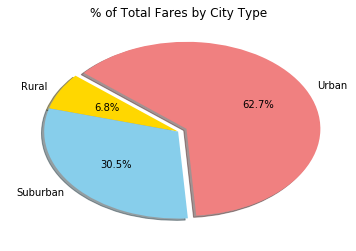

In [19]:
# Calculate Type Percents
total = pyber["fare"].sum()
total
city_type = pyber.groupby(["type"]).sum()
total_fares = city_type["fare"]/total
total_fares

# Build Pie Chart
colors = ["gold","skyblue","lightcoral"]
explode = (0.00,0.00,0.07)
plt.pie(total_fares, explode=explode, labels=total_fares.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

#plt.show()

# Save Figure
plt.savefig("TotalFares.png")

## Total Rides by City Type

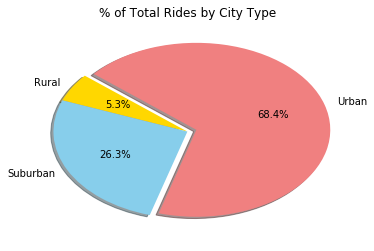

In [20]:
# Calculate Ride Percents
total = pyber["fare"].count()
total
city_type = pyber.groupby(["type"]).count()
total_rides = city_type["fare"]/total
total_rides

# Build Pie Chart
colors = ["gold","skyblue","lightcoral"]
explode = (0.00,0.00,0.07)
plt.pie(total_rides, explode=explode, labels=total_rides.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

#plt.show()

# Save Figure
plt.savefig("TotalRides.png")


## Total Drivers by City Type

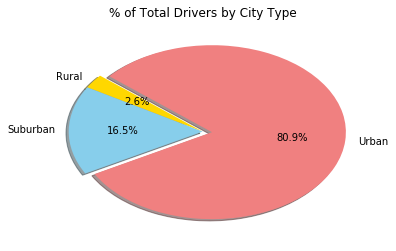

In [21]:
# Calculate Driver Percents
total = city_data_to_load["driver_count"].sum()
total 
city_type = city_data_to_load.groupby(["type"]).sum()
total_drivers = city_type["driver_count"]/total
total_drivers

# Build Pie Chart
colors = ["gold","skyblue","lightcoral"]
explode = (0.00,0.00,0.07)
plt.pie(total_drivers, explode=explode, labels=total_drivers.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDrivers.png")


# Pyber Analysis

* Urban cities have the largest shares of rides, drivers, and fares. If you're a driver, you would want to be in the urban area in order get more business.
* Suburban city drivers are more likely to make more money due to the fact there are less drivers (16.5%) to go around to serve customers (26.3%).
* Based on the data, rural cities generate the least amount of revenue. I'd recommend that the company spend less resources on rural cities and focus more urban and suburban areas in order generate more revenue.